# 3.4. 아기가 내는 소리로 마음을 알 수 있다면

> librosa 패키지 설치에 실패해서 이론만 정리.

* 배고픔과 웃음을 의미하는 아기 소리 데이터를 바탕으로 아기의 배고픔을 판단해보자.
* 아기의 울음소리를 구분하는 것은 분류(classification) 문제:
  * 분류 함수는 로지스틱 모델로 정의.
* 비용함수는 최대우도추정법과 경사하강법을 사용한다:
* 베르누이 확률분포로 배고픔(1)과 웃음(0)을 분류하면 선형회귀 모델로는 두 변수의 관계를 설명하기 어렵다.
  * 만약 기울기가 0인 직선으로 모델을 만들더라도 매번 같은 예측값을 출력할 것이므로 무의미한 모델이 된다.
  * 따라서 직선이 아닌 곡선 형태를 갖는 회귀 모델을 찾아야 한다. (비선형회귀 모델)

## S 모양의 곡선, 로지스틱 함수

* 로지스틱 함수 - 무리수 $e$에 대하여 $y = {1 \over 1 + e^{-ax}}$
* 표준 로지스틱 함수 - 로지스틱 함수에서 $a = 1$일 때, 즉 $y = {1 \over 1 + e^{-x}}$

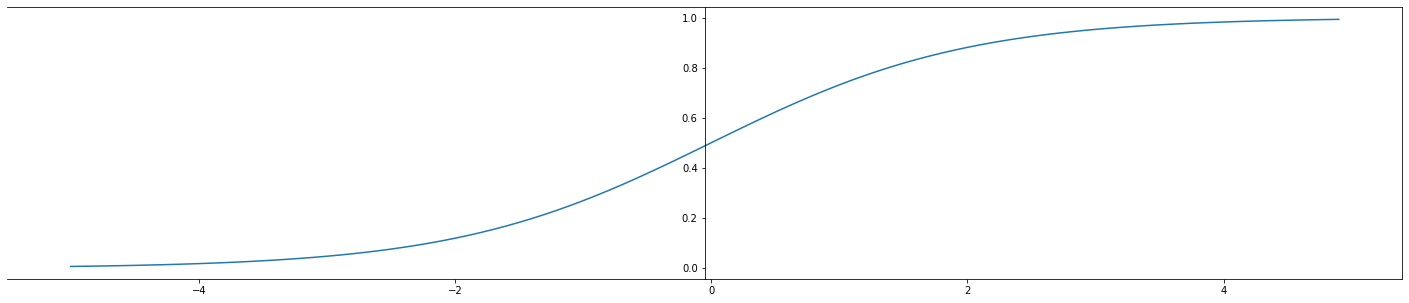

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_axis = np.arange(-5, 5, 0.1)
sig = []

for i in x_axis:
    sig.append(sigmoid(i))

plt.figure(figsize=(25, 5)).add_subplot(1, 1, 1).spines['left'].set_position('center')
plt.plot(x_axis, sig)
plt.show()

* 로지스틱 함수는 출력 변수가 항상 0과 1사이의 값을 가진다:
  * 따라서 아기가 배고픔을 의미하는지 아닌지 분류하는 기준값을 0.5로 두면:
    * $f(x)$가 0.5보다 크면 $y = 1$, 아기는 배고프다.
    * $f(x)$가 0.5보다 작다면 $y = 0$, 아기는 배고프지 않다.
* 로지스틱 함수를 활용해 곡선의 형태를 갖는 회귀 모델을 찾는다는 것은 로지스틱 함수에 사용되는 적절한 $\beta_0, \beta_1$ 값을 찾는 것이다:
  $f(x) = {1 \over {1 + e^{-(\beta_1x + \beta_0)}}}$
  * 주로 $\beta_1$은 모양에, $\beta_0$은 위치에 관여한다.
    ![](https://user-images.githubusercontent.com/6410412/107109990-8f5c5a00-6887-11eb-9f3a-272639b46ed2.png)

## 최소의 비용함수를 찾는 방법, 최대우도추정법 (Maximum Likelihood Estimation)

* 좋은 곡선을 찾으려면 입력 변수 $x$에 따른 출력 변수의 예측값 $f(x)$가 실제 출력값 $y$에 가까운 값이 되도록 하는 모델 $f$를 찾아야 한다.
* $y = 1$일 확률이 $p$일 때, 확률질량함수는 다음과 같다:
  $P(Y = y) = p^y(1-p)^{1 - p}$
* 로지스틱 회귀 모델 $f(X)$에 대하여 입력 변수 $X = x_i$라 할 때, 출력 변수가 $Y_i$라면, $Y_i$ 또한 0베르누이 확률변수에 해당한다:
  * 이때 로지스틱 회귀 모델에 의한 함숫값 $f(x_i)$는 $Y_i = 1$일 확률이므로 $Y_i$의 확률질량함수는 다음과 같다:
    $P(Y_i = y_i) = \{f(x_i)\}^{y_i}\{1 - f(x_i)\}^{1 - y_i}$
  * 입력 변수 $X$가 취하는 각각의 값 $x_i (i=1, 2, \dots, n)$에 따라 $Y_i$가 0 또는 1의 값을 가지는 사건은 서로 독립이다.
  * 서로 독립인 모든 경우를 함께 고려해 곱으로 나타낸 것을 우도함수(Likelihood function)라고 한다.
  * 로지스틱 회귀 모델 $f(X)$에 대한 우도함수 $L$은 다음과 같다:
    $L(\beta_0, \beta_1) = \Pi^n_{i=1}\{f(x_i)\}^{y_i}\{1 - f(x_i)\}^{1- y_i}$
* 우도함수를 이용해 로지스틱회귀 모델의 비용함수를 만들 수 있다:
  * 우도함수의 값이 클수록 로지스틱 회귀 모델 $f$가 실제 분포와 닮아 있음을 의미한다.
  * 따라서 우도함수 $L(\beta_0, \beta_1)$이 최대가 되도록 만들어 비용함수로 둘 수 있다.
  * 증가함수의 성질에 따라, 우도함수 $L(\beta_0, \beta_1)$이 최대가 되려면 $\ln L(\beta_0, \beta_1)$이 최대면 된다.
* 보통 회귀 모델의 최적화 과정에서 사용하는 비용함수는 최소일 때를 찾는다:
  * 따라서 -1을 곱한 $-\ln L(\beta_0, \beta_1)$을 비용함수로 정의한다.
  * 이렇게 정의한 비용함수는 감소함수이므로, 감소함수의 성질에 따라 우도함수가 최대일 때 비용함수가 최소임을 알 수 있다:
    $Cost(\beta_0, \beta_1) = -\ln L(\beta_0, \beta_1) = -\ln \sum^n_{i=1}[y_i \ln f(x_i) + (1 - y_i) \ln \{1 - f(x_i)\}]$

## 최대의 우도함수를 찾는 방법, 경사하강법 (Gradient descent)

* 선형회귀 모델에서는 평균제곱근오차(RMSE)를 바탕으로 비용함수를 정의했다:
  * RMSE가 최소일 때를 구할 최소제곱법(LSM)을 사용해 정확한 해 $\beta_0, \beta_1$를 구할 수 있었다.
  * 하지만 로지스틱 회귀 모델과 같은 비용함수에서는 한 번에 명시적인 해를 구할 수 없는 경우가 많다.
  * 이 경우, 비용함수가 점점 최소가 되도록 하는 $\beta_0$ 또는 $\beta_1$을 귀납적으로 찾아갈 수 있다.
* 경사하강법은 미분계수인 접선의 기울기를 사용해 비용함수의 최소인 점을 찾아나가는 방법이다.

### 경사하강법에 대한 이해

* 이차 함수 $y = f(x)$의 그래프 위를 움직이는 점 $P$가 $P_1(x_1, y_1)$의 위치에 놓여 있고, 우리는 점 $P$의 x좌표를 조절해 점을 움직일 수 있다고 가정하자.
* 함수식이나 그래프를 모두 안다면 단번에 x좌표를 정해 함수 $y = f(x)$가 최소인 지점 $A$에 도달할 수 있을 것이다.
* 하지만 $x = x_1$인 지점에서의 정보만 안다면? 어느 방향으로 가야 작아지는지, 얼마나 가야하는지 모른다면?
  1. $x = x_1$에서 경사(미분계수)가 $f\prime(x_1) = 200$이라고 하면:
    * 미분계수가 양수이므로 함수 $f(x)$는 $x = x_1$에서 증가하는 중이다.
    * 따라서 최소인 지점 $x = a$에 도달하려면 x좌표를 작게 조절할 필요가 있다.
    * 미분계수의 절대값이 크므로, 아직 최소인 지점과 거리가 있음을 알 수 있다.
    * 따라서 점 $P$의 x좌표를 $x = x_2$로 많이 줄여 점 $P_2$ 위치로 이동한다.
  2. $x = x_2$에서 경사(미분계수)가 $f\prime(x_2) = 160$이라고 하면:
    * 미분계수가 여전히 양수이므로 x좌표를 작게 조절할 필요가 있다.
    * 미분계수가 전보다 작아졌으므로 최소인 지점에 좀 더 가까워졌음을 알 수 있다.
    * 따라서 점 $P$의 x좌표를 $x = x_3$로 전 단계보다는 작게 조절해 점 $P_3$ 위치로 이동한다.
* 이러한 규칙에 따라 이동하다보면 곡선 $y = f(x)$ 위를 움직이는 점 $P$는 점점 최소인 점 $A$를 향해 움직일 것이다.
  ![](https://user-images.githubusercontent.com/6410412/107111929-3f858f00-6897-11eb-8b7c-a3823d558231.png)
  * 따라서 함수 $y = f(x)$의 최소인 점에 점점 가까워지는 점 $P_n$의 x좌표 $x_n$은 다음과 같이 표현할 수 있다:
    \begin{cases}
      x_1 = \text{(initial value of x)} \\
      x_{n+1} = x_n - af\prime(x_n) &(\text{a is }\Bbb{R}^+)
    \end{cases}

### 경사하강법의 디테일, 학습률(learning rate)

* 경사하강법을 나타내는 점화식에서 양의 상수 $a$를 학습률이라고 한다:
  * 파라미터를 조절하는 비례상수로서, 비용함수 위에서 최소인 지점을 찾아 움직이는 점의 보폭을 결정한다.
  * 즉, 학습률 $a$의 크기에 비례하여 업데이트 때마다 파라미터가 조절되는 변화량이 결정된다.
* 적절한 학습률을 정해야 한다. 데이터와 상황에 따라 다르지만, 보통 0.001 정도로 정한다.
  * 학습률이 너무 작으면 파라미터가 적게 조정되어 최솟값을 찾기까지 많은 시간과 계산이 필요해진다.
  * 학습률이 너무 크면 최소로부터 점점 멀어지는 현상이 발생한다.
  ![](https://user-images.githubusercontent.com/6410412/107112153-b707ee00-6898-11eb-9d93-9c3ead958ff7.png)

## 모델 학습하기

![](https://user-images.githubusercontent.com/6410412/107112305-0864ad00-689a-11eb-89d1-c2ec4a22f57d.png)

* 모델을 최적화한다는 것은 적절한 파라미터를 찾는 것:
* K-NN이나 K-Means, LSM은 한번의 연산으로 최적화가 가능했다.
* 하지만 경사하강법은 여러 번의 연산을 거쳐야 한다.
  * 이를 위해 데이터 셋의 데이터를 여러 배치(batch)로 쪼갠다.
  * 전체 데이터의 학습을 완료하면 1에포크(epoch)가 완료되었다고 한다.
* 경사하강법에서 1에포크가 완료되었다는 것은 비용함수를 편미분한 결과에 학습률을 곱해 이전 파라미터에 더하거나 빼 파라미터 업데이트를 완료했다는 의미.